In [1]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm

In [2]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [3]:
%load_ext autoreload
%autoreload 2

import qe_BS_DOS
import wannier_loader 

# QE

In [4]:
calc = qe_BS_DOS.VASP_analyse_spinpolarized_3D('./', 'Fe')

efermi 16.50
Unit Cell Volume:   12.3211  (Ang^3)
Reciprocal-Space Vectors (Ang^-1)
[[ 2.1591712401  0.            2.1591712401]
 [-2.1591712401  2.1591712401  0.          ]
 [ 0.           -2.1591712401  2.1591712401]]
Real-Space Vectors (Ang)
[[ 1.454999305  1.454999305  1.454999305]
 [-1.454999305  1.454999305  1.454999305]
 [-1.454999305 -1.454999305  1.454999305]]
['G', 'H', 'N', 'G', 'P', 'H']


In [5]:
calc.get_qe_kpathBS()

G
H
N
G
P
H


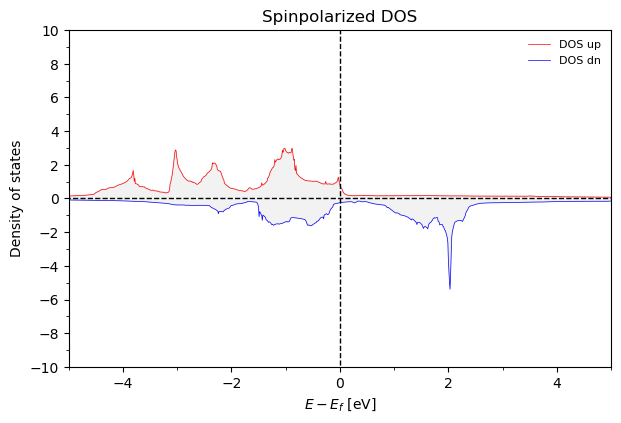

In [6]:
calc.plot_FullDOS()

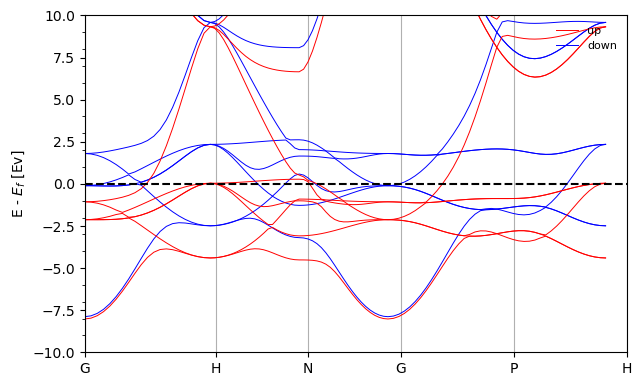

In [7]:
calc.plot_BS()

In [8]:
calc.print_bands_range(4, 14)

efermi 16.50
-------------SPIN UP---------------
band 5 eV from  8.48 to  13.54                 eV-eF from  -8.02 to  -2.96
band 6 eV from  12.10 to  14.48                 eV-eF from  -4.40 to  -2.02
band 7 eV from  13.42 to  16.53                 eV-eF from  -3.08 to  0.03
band 8 eV from  14.37 to  16.53                 eV-eF from  -2.13 to  0.03
band 9 eV from  14.80 to  16.77                 eV-eF from  -1.70 to  0.27
band 10 eV from  15.37 to  25.83                 eV-eF from  -1.13 to  9.33
band 11 eV from  22.84 to  40.32                 eV-eF from  6.34 to  23.82
band 12 eV from  24.60 to  40.32                 eV-eF from  8.10 to  23.82
band 13 eV from  26.28 to  40.85                 eV-eF from  9.78 to  24.35
band 14 eV from  31.34 to  53.51                 eV-eF from  14.84 to  37.01
-------------SPIN DN---------------
band 5 eV from  8.61 to  15.10                 eV-eF from  -7.89 to  -1.40
band 6 eV from  14.01 to  16.50                 eV-eF from  -2.49 to  0.00
band 7 e

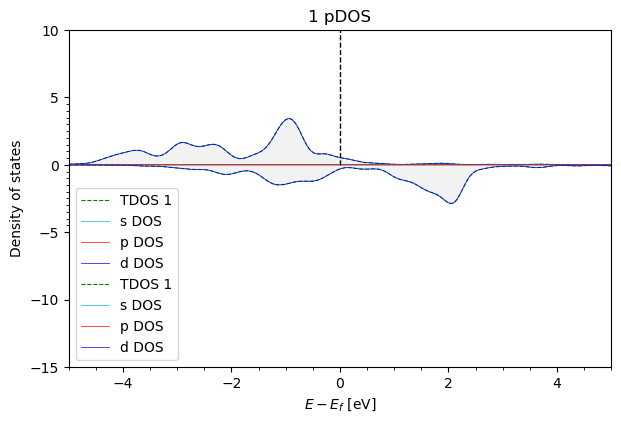

In [9]:
calc.get_pDOS()
calc.plot_pDOS('1')

# Wannier bands

In [12]:
calc.load_wannier()

nwa  9
Rpts 597
nwa  9
Rpts 597
(9, 9, 597) (9, 9, 597)


100%|██████████| 101/101 [00:00<00:00, 253.27it/s]


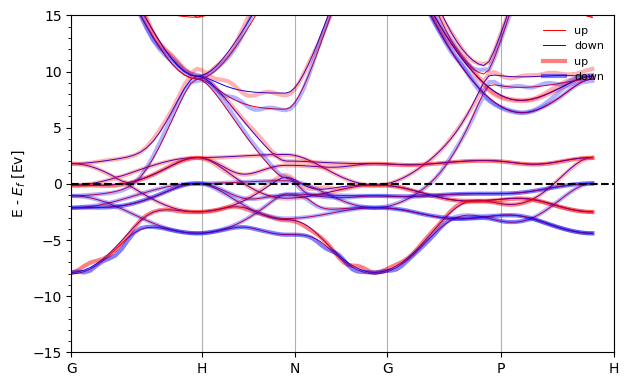

In [17]:
calc.plot_wannier_BS()